#### 1 LEVEL (Preparation): Setup and general utility functions are declared to be used in the other analysis levels

In [1]:
""" Import Libraries """

import numpy as np
import pandas as pd
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import os

os.getcwd()

'C:\\Users\\moche\\Documents\\working_programs\\old code'

In [2]:
" Utility Functions"

def namestr(obj, namespace):
    
    """
    -Calls name of non string variable as a string
    
    Inputs: 'obj' (type)       - Any non string object to be named
            'namespace' (type) - Symbol table to be accessed
    
    Outputs: "Obj" (String)
    
    """
    
    return [name for name in namespace if namespace[name] is obj]


In [3]:
" Data Importing "

# Extract dataframe from .csv and turn to numpy array
df = pd.read_csv('Lip_space_time-17-Nov-2021.csv') 
data = df.to_numpy()

# Remove NaN columns 
adj_data = np.delete(data,[7,12,13,14],1) # Removed PI45P2, Carmil, ArpB & PI4P columns 

# Extract column values separately 
gDistance = adj_data[:,0]
time = adj_data[:,1]
Curvature = adj_data[:,2]
PIP3 = adj_data[:,3]
Actin= adj_data[:,4]
NAP = adj_data[:,5]
PI34P2 = adj_data[:,6]
PTEN = adj_data[:,7]
Myo1B = adj_data[:,8]
Myo1E = adj_data[:,9]
Coronin = adj_data[:,10]


#### 2 LEVEL (Numerical & Abstract Processing): Data processing functions declared to be used for statistical and graphical analyses

In [4]:
" Data Processing "

def dc_dt(c_arr, t_int, mov_len):
    
    """
    - Function to calculate the corresponding rate of change of flux w.r.t time.
    - Under assumption that input c_arr follows time scheme given in df of input data.
    - First 19 values are calculated with constant time interval 3s, 20th automatically
      set to zero. 
    
    Inputs: c_arr (1D Array)    - Input array of concentration values for series of cup closures 
            t_int (int)         - Time interval at which measurements were taken for concentration values
            mov_len (int)       - How many time intervals (t_int) per movie
   
    Outputs: dc_arr(array(1D)) - Output array of dc/dt values for all concentration points sans 20*nth values
    
    """
    
    num_of_elements = len(c_arr) 
    num_of_movies = num_of_elements/mov_len
    
    zero_ind_arr = np.subtract(np.multiply(np.arange(1,num_of_movies+1),mov_len),1)
    dc_arr = np.empty([num_of_elements,1])
    
    for value in range(num_of_elements-1):
        
        dc_arr[value]= (c_arr[value+1]-c_arr[value])/t_int
    
    for index in range(len(zero_ind_arr)):
        
        dc_arr[int(zero_ind_arr[index])] = 0
    
    return dc_arr

#print(dc_dt(adj_data[:,3],3,20))



#### 3 LEVEL (Graphical) - 2 Level processing applied for specific data sets for visualisation and investigation

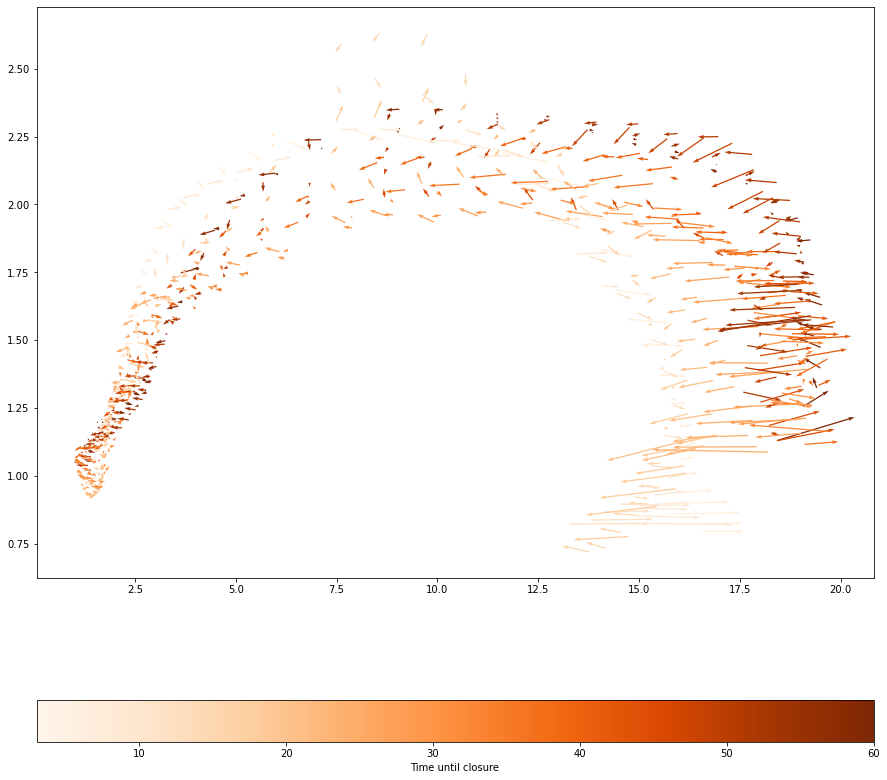

In [5]:
" Graphical Processing "

def plot_phase_2c(a, h, dadt, dhdt, cmap_arr=np.multiply(time,-1), cmap_choice=cm.Oranges, plot_style='ggplot'):
    
    """
    - Plots a phase portrait of 2-component system.
    - Differentials are approximated by dividing the change in concentration by the time unit t_int
    - Resulting portrait is saved to file with appropriate header names
    
    Inputs: 'a' (1D Array)        - Activator chemical concentration 
            'h' (1D Array)        - Inhibitor chemical concentration 
            'dadt' (1D Array)     - Rate of change of 'a' w.r.t time
            'dhdt' (1D Array)     - Rate of change of 'h' w.r.t time
            'cmap_arr' (1D Array) - Range of numerical values upon which to impose RGB colour map
                                    Default is positive time values
            'cmap_choice' (cm)    - Colour map style to use. Default is cm.Oranges
            'plot_style'  (kwarg) - Plotting style to use. Default is 'ggplot'
            
    Outputs: 'ax, fig' (subplot)  - Axes on which phase portrait is printed to console
    
    """
    
#     str_a = namestr(a, globals())[0] # 'a' variable name as string
#     str_h = namestr(h, globals())[0] # 'h' variable name as string
    
    # Initialise Colour Map
    colour = cmap_arr       # set colour range to organise the data against
    norm = Normalize()     
    norm.autoscale(colour)  # Scale 'colour' array elements between 0 and 1 
    colourmap = cmap_choice # RGB colour map to be used

    # Initialise Colour Bar
    sm = plt.cm.ScalarMappable(cmap=colourmap, norm=norm)
    sm.set_array([])
    
    # Plot Phase Portrait
    fig, ax = plt.subplots()
    ax.quiver(a, h, dadt,dhdt,scale=5,width=0.0015, color=colourmap(norm(colour)))
    plt.colorbar(sm, label='Time until closure', orientation='horizontal')
    plt.style.use(plot_style)
    
    # Plot Adjustments
    fig.set_figwidth(15)
    fig.set_figheight(15)
#     plt.title("Phase portrait of " + str_a + " against " + str_h)
#     plt.xlabel(str_a)
#     plt.ylabel(str_h)
    
    # Store Image
    #plt.savefig(str_a+"_"+str_h,dpi=300)

plot_phase_2c(PIP3,NAP,dc_dt(PIP3,3,20),dc_dt(NAP,3,20))

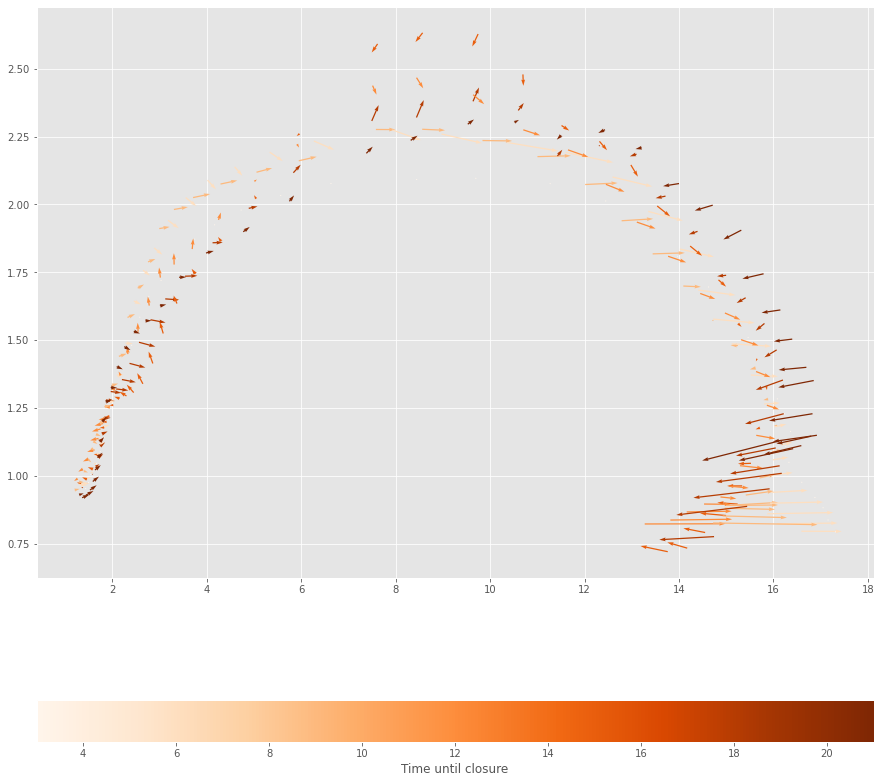

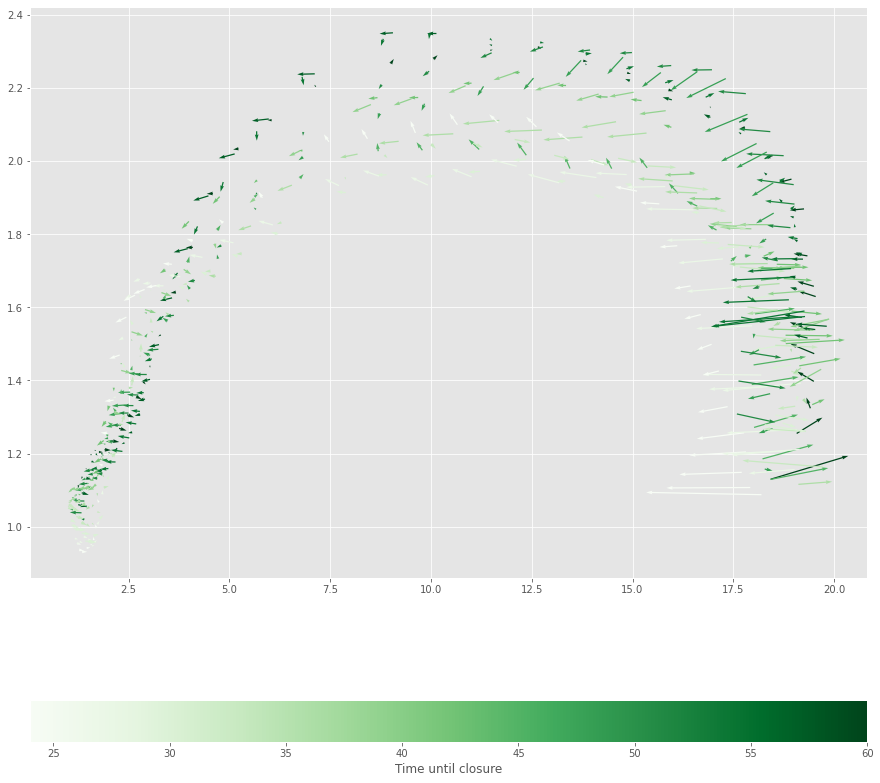

In [6]:
" Graphical Processing "

def time_restricted_phase_2c(a, h, dadt, dhdt, cutoff_time, t_array, cmap1, cmap2, plot_style):
    
    """
    - Creates two separate phase portaits, one before and one after a specified cutoff time
    - Expects time array to be continous repetitions of the same period with the same t_int per unit
    
    Inputs: 'a' (1D Array)        - Activator chemical concentration 
            'h' (1D Array)        - Inhibitor chemical concentration 
            'dadt' (1D Array)     - Rate of change of 'a' w.r.t time
            'dhdt' (1D Array)     - Rate of change of 'h' w.r.t time
            'cutoff_time' (int)   - Time until closure between [t(0),t(n)] that is used to divide the data
            't_array' (1D Array)  - Time array conforming to the expectation above in function description
                                    Default is positive time values
            'cmap1' (cm)          - Colour map style to use for portrait 1. 
            'cmap2' (cm)          - Colour map style to use for portrait 2. 
            'plot_style'  (kwarg) - Plotting style to use. Default is 'ggplot'.
            
    Outputs: 'ax1, ax2'           - Axes for phase portaits
             'fig1, fig2'         - Figures for phase portraits

    """
    
    plot_array = np.column_stack((t_array, a, h, dadt, dhdt)) # stack the plotting columns with time
                            
    phase1 = np.delete(plot_array, np.where(plot_array[:,0] <= -cutoff_time), axis=0) # final 'cutoff_time' seconds until end
    phase2 = np.delete(plot_array, np.where(plot_array[:,0] > -cutoff_time), axis=0) # from start until 'cutoff_time'
    
    chem1_act = phase1[:,1]
    chem2_act = phase1[:,2]
    chem1_bct = phase2[:,1]
    chem2_bct = phase2[:,2]
    
    plot_phase_2c(chem1_act, chem2_act, phase1[:,3], phase1[:,4], np.multiply(phase1[:,0],-1), cmap1)
    plot_phase_2c(chem1_bct, chem2_bct, phase2[:,3], phase2[:,4], np.multiply(phase2[:,0],-1), cmap2)
    
time_restricted_phase_2c(PIP3, NAP, dc_dt(PIP3,3,20), dc_dt(NAP,3,20), 24, time, cm.Oranges, cm.Greens, 'ggplot')


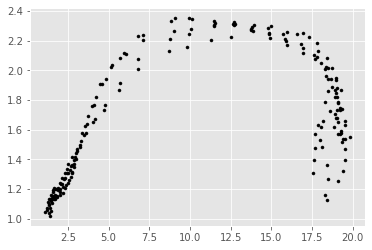

In [7]:
" Graphical Processing "

def isolated_phase_2c(a, h, dadt, dhdt, ctime1, ctime2, t_array, cmap_choice, plot_style):
    
    """
    - Creates two separate phase portaits, one before and one after a specified cutoff time
    - Expects time array to be continous repetitions of the same period with the same t_int per unit
    
    Inputs: 'a' (1D Array)        - Activator chemical concentration 
            'h' (1D Array)        - Inhibitor chemical concentration 
            'dadt' (1D Array)     - Rate of change of 'a' w.r.t time
            'dhdt' (1D Array)     - Rate of change of 'h' w.r.t time
            'ctime1' (int)        - Upper limit on time until closure (positive) range to be plotted
            'ctime2' (int)        - Lower limit on time until closure (positive) range to be plotted
            
            -60s ---------------/ [-ctime1] ------------------------ [-ctime2] /----------------- 0s (closure)
            
            't_array' (1D Array)  - Time array conforming to the expectation above in function description
                                    Default is positive time values
            'cmap_choice' (cm)          - Colour map style to use for portrait.
            'plot_style'  (kwarg) - Plotting style to use. Default is 'ggplot'.
            
    Outputs: 'ax1, ax2'           - Axes for phase portaits
             'fig1, fig2'         - Figures for phase portraits

    """
    
    plot_array = np.column_stack((t_array, a, h, dadt, dhdt)) # stack the plotting columns with time
                            
    pre_phase = np.delete(plot_array, np.where((plot_array[:,0] < -ctime1)), axis=0) # cut out times above ctime1
    phase = np.delete(pre_phase, np.where((pre_phase[:,0] > -ctime2)), axis=0) # cut out times below ctime2
    
    #plot_phase_2c(phase[:,1], phase[:,2], phase[:,3], phase[:,4], np.multiply(phase[:,0],-1), cmap_choice, plot_style)
    plt.scatter(phase[:,1], phase[:,2], marker='.', color='black')
    
    
isolated_phase_2c(PIP3, NAP, dc_dt(PIP3,3,20), dc_dt(NAP,3,20), 60, 48, time, cm.Oranges, 'ggplot')


#### 4 LEVEL (Modelling) - Cells dedicated to fitting and data manipulation for ease of processing

Text(0, 0.5, 'w')

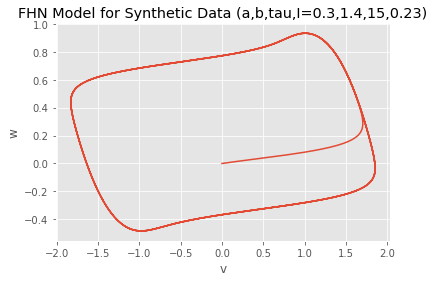

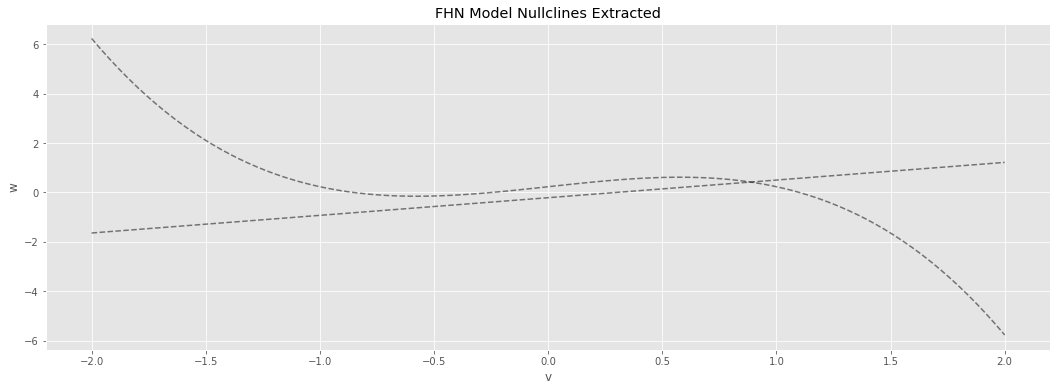

In [8]:
" Fitzhugh Nagumo Model "
        
# Set up initial conditions
p = (0.3,1.4,15,0.23) #a,b,tau,I
time_span = np.linspace(3, 60, num=1500)

scenarios = [
     {"a":-.3, "b":1.4, "tau":20, "I":0},
     {"a":-.3, "b":1.4, "tau":20, "I":0.23},
     {"a":-.3, "b":1.4, "tau":20, "I":0.5}
]
time_span = np.linspace(0, 200, num=1500)

# Define model to solve
def fhn_model(x, t, a, b, tau, I):
    
    """
    Inputs: 'x' (1D Array)    - [membrane potential, recovery variable] at time t
            't' (Float)       - time point 
            'a' (Float)       - parameter 1
            'b' (Float)       - parameter 2
            'tau' (Float)     - timescale parameter
            'I' (Float)       - Stimulus constant
            
    Outputs: dx/dt (1D array) - time derivative of x[0] and x[1]
    
    """
    
    dx0dt = x[0] - (x[0]**3/3) - x[1] + I # dv/dt
    dx1dt = (x[0] + a - b*x[1])/tau # dw/dt
    
    return np.array([dx0dt, dx1dt])

# Solve that model 
result_int = scipy.integrate.odeint(fhn_model, t=time_span,y0=[0,0], args= p)
plt.title("FHN Model for Synthetic Data (a,b,tau,I=0.3,1.4,15,0.23)")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(result_int[:,0], result_int[:,1])

# Solve for nullclines where dx/dt = 0
def plot_nullcline(ax, a, b, tau, I, color='k', style='--', opacity=.5, vmin=-2,vmax=2):
    
    """
    Plot the null isoclines of the Fitzhugh nagumo system. 
    When we have the FHN dx/dt = 0, we can rearrange for x[1],
    thus we get x[1] for when dv/dt or dw/dt=0 and we can plot these equations.
    
    """
    
    v = np.linspace(vmin,vmax,100) # range of v values over which to solve 
    ax.plot(v, v - v**3 + I, style, color=color, alpha=opacity) # solve dv/dt = x[1](w)
    ax.plot(v, (v - a)/b, style, color=color, alpha=opacity) # solve dw/dt = x[1](w)

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
plot_nullcline(ax,0.3,1.4,15,0.23)
plt.title("FHN Model Nullclines Extracted")
plt.xlabel("v")
plt.ylabel("w")


#### 5 LEVEL (Investigation) - Cells to explore and tinker with data informally

Identifying the Boomerang

(164,)


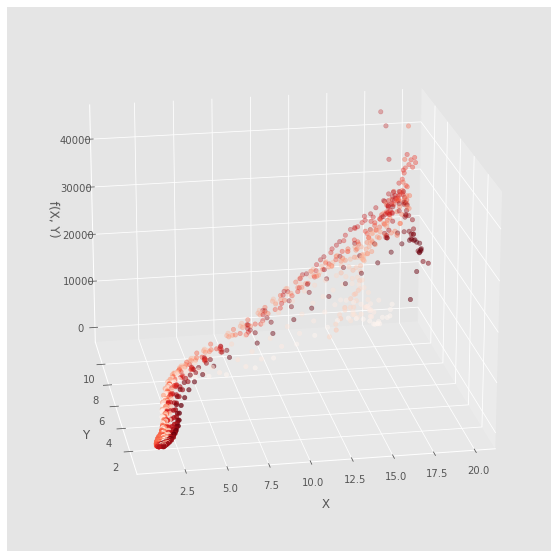

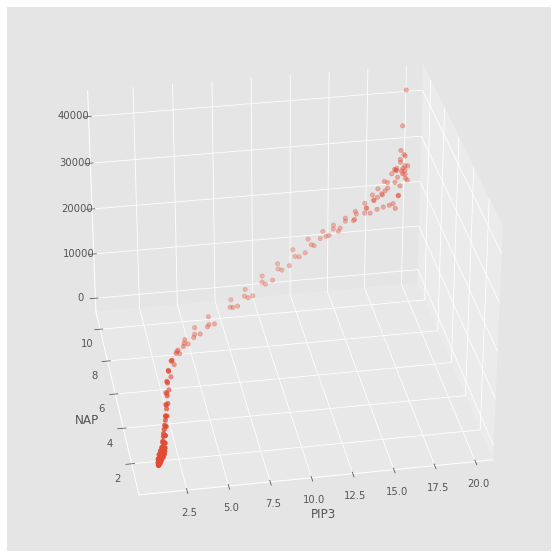

In [10]:
" Verifying dual regimes and Investigating possibility for more by looking at the 'cutoff' time "

X = PIP3
Y = Actin

dXdt = dc_dt(X,3,20)
dYdt = dc_dt(Y,3,20)

m_vec = np.sqrt(np.power(dXdt,2) + np.power(dYdt,2)) # magnitude of the dc/dt vectors

Z = m_vec.flatten() + np.power(np.multiply(X,Y),2)

# print(np.shape(m_vec))
# print(np.shape(time))

fig1, ax1 = plt.subplots(figsize=(10,10), subplot_kw={"projection": "3d"})
fig2, ax2 = plt.subplots(figsize=(10,10), subplot_kw={"projection": "3d"})

# define colour map
colour = np.multiply(time,-1) # make positive to normalise as [0,1]
norm = Normalize() # Norm func
norm.autoscale(colour) # Scale 'colour' array elements between 0 and 1 
colourmap = cm.Reds # RGB mapping to be used

# print("------X----------")
# print(dXdt)
# print("------Y----------")
# print(dYdt)
# print("------m----------")
# print(m_vec)

# form plotting matrix
plot_matrix = np.column_stack((X,Y,Z,time))

choose_upper_time = -36 # inclusive upper (negative) limit
choose_lower_time = -27 # inclusive lower (negative) limit 

# Show data points with choose_upper_time (inlusive) to choose_lover_time (exclusive)
plot_matrix1 = np.delete(plot_matrix, np.where((plot_matrix[:,3]<choose_upper_time)),axis=0)
plot_matrix2 = np.delete(plot_matrix1, np.where((plot_matrix1[:,3]>choose_lower_time)),axis=0)

print(plot_matrix2[:,0].shape)

ax1.scatter3D(X,Y,Z, color=colourmap(norm(colour)))
ax2.scatter3D(plot_matrix2[:,0],plot_matrix2[:,1],plot_matrix2[:,2])



# ax1.set_zlim([0,0.15])
# ax1.set_xlim([0,12.5])
# ax1.set_ylim([0,1.6])

# ax2.set_zlim([0,0.15])
# ax2.set_xlim([0,10])
# ax2.set_ylim([0.6,1.6])

plt.xlabel("PIP3")
plt.ylabel("NAP")
ax1.set_xlabel("\n X")
ax1.set_ylabel("\n Y")
ax1.set_zlabel("\n f(X, Y)")
ax1.view_init(20, 260)
ax2.view_init(30, 260)
plt.show()


Splitting the Boomerang